In [ ]:

import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import calibration_curve
from sklearn import datasets
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [ ]:
dataset = pd.read_csv("titanic_survival_data.csv")
dataset.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'no_cabin', 'Label'],
      dtype='object')

In [ ]:
X = dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
      'Embarked', 'no_cabin']]
y = dataset[['Label']].values.ravel()

In [ ]:
RF = RandomForestClassifier()
p_grid = {"n_estimators" : [100,300,500,800]}
clf = GridSearchCV(estimator = RF, param_grid = p_grid, cv = KFold(n_splits = 5, shuffle = True),n_jobs = -1, verbose = 1)
clf_fit = clf.fit(X,y).predict_proba(X)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.7s finished


In [ ]:
GB = GradientBoostingClassifier()
gb_grid = {"n_estimators" : [100,300,500,800]}
gbf = GridSearchCV(estimator = GB, param_grid = gb_grid, cv = KFold(n_splits = 5, shuffle = True),n_jobs = -1, verbose = 1)
gbf_fit = gbf.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.2s finished


In [ ]:
LR = LogisticRegression()
lr_grid = {
    "max_iter":[2500,5000,8000,10000]}

lrf = GridSearchCV(estimator = LR, param_grid = lr_grid, cv = KFold(n_splits = 5,shuffle = True),n_jobs = -1, verbose = 1)
lrf_fit = lrf.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished


### Metrics

In [ ]:
scores = {'accuracy' : 'accuracy',
          "roc":'roc_auc'}

In [ ]:
rf_nested_scores = cross_validate(estimator = clf, X = X, y = y,cv = KFold(n_splits = 5),
                          scoring = scores, n_jobs = -1, verbose = 1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   31.0s remaining:   46.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.0s finished


In [ ]:
gb_nested_scores = cross_validate(estimator = gbf, X = X, y = y,cv = KFold(n_splits = 5),
                          scoring = scores, n_jobs = -1, verbose = 1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.4s remaining:   20.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.9s finished


In [ ]:
lr_nested_scores = cross_validate(estimator = lrf, X = X, y = y,cv = KFold(n_splits = 5),
                          scoring = scores, n_jobs = -1, verbose = 1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished


In [ ]:
#Random Forest
print("Accuracy:", statistics.mean(rf_nested_scores['test_accuracy']))
print("ROC:", statistics.mean(rf_nested_scores['test_roc']))

Accuracy: 0.8047517418868871
ROC: 0.8589988699652046


In [ ]:
#Gradient Boosting
print("Accuracy:", statistics.mean(gb_nested_scores['test_accuracy']))
print("ROC", statistics.mean(gb_nested_scores['test_roc']))

Accuracy: 0.8215680120519742
ROC 0.8613827742374981


In [ ]:
#Logistic Regression
print("Accuracy:", statistics.mean(lr_nested_scores['test_accuracy']))
print("ROC", statistics.mean(lr_nested_scores['test_roc']))

Accuracy: 0.7923356976963154
ROC 0.8489439805080443


### Probabilities

In [ ]:
rf_class_probabilities = cross_val_predict(estimator = clf, X = X, y = y,cv = KFold(n_splits = 5, shuffle = True)
                                        ,method = "predict_proba", n_jobs = -1, verbose = 1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   24.4s remaining:   36.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.9s finished


In [ ]:
gb_class_probabilities = cross_val_predict(estimator = gbf, X = X, y = y,cv = KFold(n_splits = 5, shuffle = True)
                                        ,method = "predict_proba", n_jobs = -1, verbose = 1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.2s remaining:   18.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.4s finished


In [ ]:
lr_class_probabilities = cross_val_predict(estimator = lrf, X = X, y = y,cv = KFold(n_splits = 5, shuffle = True)
                                        ,method = "predict_proba", n_jobs = -1, verbose = 1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished


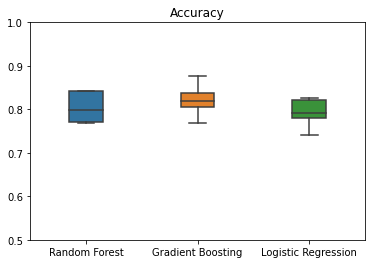

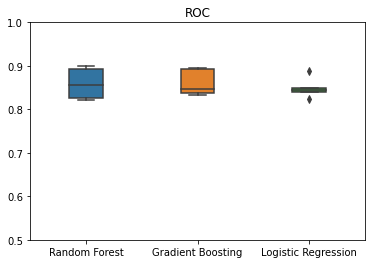

In [ ]:
#Y-axis range (0)

rf_acc = rf_nested_scores['test_accuracy']
gb_acc = gb_nested_scores['test_accuracy']
lr_acc = lr_nested_scores['test_accuracy']
sns.boxplot(data = [rf_acc,gb_acc,lr_acc], width = 0.3).set_title("Accuracy")
plt.xticks([0,1,2], ["Random Forest","Gradient Boosting","Logistic Regression"])
plt.ylim(0.7,1)
plt.show()


rf_roc = rf_nested_scores['test_roc']
gb_roc = gb_nested_scores['test_roc']
lr_roc = lr_nested_scores['test_roc']
sns.boxplot(data = [rf_roc,gb_roc,lr_roc], width = 0.3).set_title("ROC")
plt.xticks([0,1,2], ["Random Forest","Gradient Boosting","Logistic Regression"])
plt.ylim(0.7,1)
plt.show()

In [ ]:
rf_proba = rf_class_probabilities[:,1]

rf_fraction_of_positives, rf_mean_predicted_value = calibration_curve(y, rf_proba, n_bins=10)

In [ ]:
gb_proba = gb_class_probabilities[:,1]

gb_fraction_of_positives, gb_mean_predicted_value = calibration_curve(y, gb_proba, n_bins=10)

In [ ]:
lr_proba = lr_class_probabilities[:,1]

lr_fraction_of_positives, lr_mean_predicted_value = calibration_curve(y, lr_proba, n_bins=10)

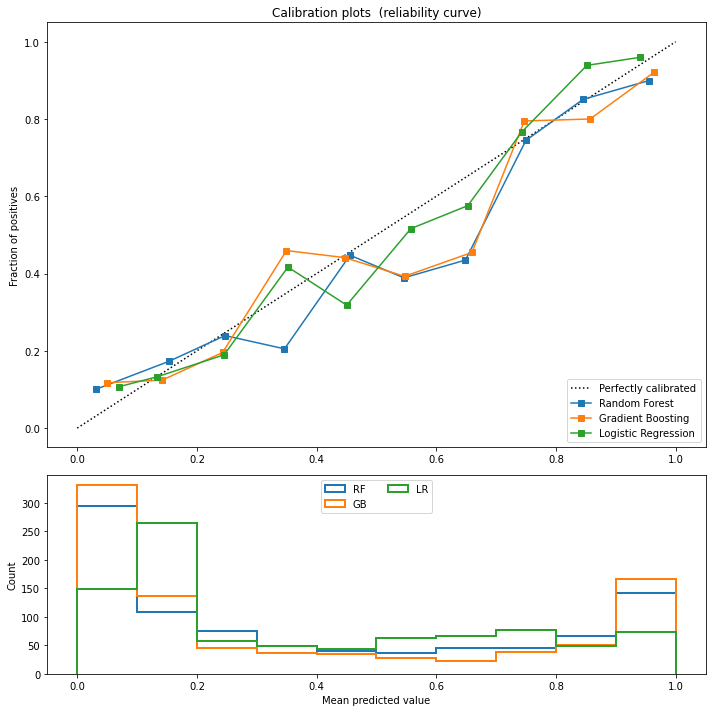

In [ ]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.plot(rf_mean_predicted_value, rf_fraction_of_positives, "s-",
             label="%s" % ("Random Forest", ))
ax1.plot(gb_mean_predicted_value, gb_fraction_of_positives, "s-",
             label="%s" % ("Gradient Boosting", ))
ax1.plot(lr_mean_predicted_value, lr_fraction_of_positives, "s-",
             label="%s" % ("Logistic Regression", ))


ax2.hist(rf_proba, range=(0, 1), bins=10, label="RF",
             histtype="step", lw=2)
ax2.hist(gb_proba, range=(0, 1), bins=10, label="GB",
             histtype="step", lw=2)
ax2.hist(lr_proba, range=(0, 1), bins=10, label="LR",
             histtype="step", lw=2)
    
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

# Exercise 2 - NN theoretical (10 points)
1. Suppose there is a Multi-Layer Perceptron (MLP) composed of one input layer with 8 neurons, followed by one hidden layer with 30 artificial neurons, and one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.

a. Deduce the shape of input matrix X, hidden layer’s weight vector Wh, bias vector bh and the shape of the network’s output matrix Y. **(2 points)**



${X}= nx8$

As there are 8 neurons in the first layer and 30 in the second, there will be 30 connections from layer 1 to layer 2 and that is the reason behind the shape of the vector. Note: we are doing matrix multiplication and therefore the shape of these matrices is important.

${w}_h= 8x30$ --> vector of ${w}_h= 1x30$ 


${b}_h= 1x30$

b. Write the equation that computes the network’s output matrix Y as a function of X, Wh , bh , Wo and bo. **(2 points)**

$Y = ReLU({X}_{nx8}*{{W}_{h}}_{8x30}+{{b}_{h}}_{nx30})*{{W}_{o}}_{30x3}+{{b}_{0}}_{nx3}$

2. What are principle and unavoidable limitations of the backpropagation (BP)? **(1 point)**


Backpropagation (BP) is an algorithm that works by computing the gradient of error rate with respect to each weight and each bias in the network, following the chain rule. It computes the gradient of each layer and iterates backward. We run the algorithm for multiple iterations until we get a sufficiently low training error.

*   Algorithm might get stuck into local optima of error/loss function
*   Overfitting
*   Difficult to train


3. The shown figure is a 3 layer neural network.

a. Compute h1, h2, o1, and total error using ReLU units. Note: b1, b2 and b3 represent the biases added to their respective units. **(2 points)**

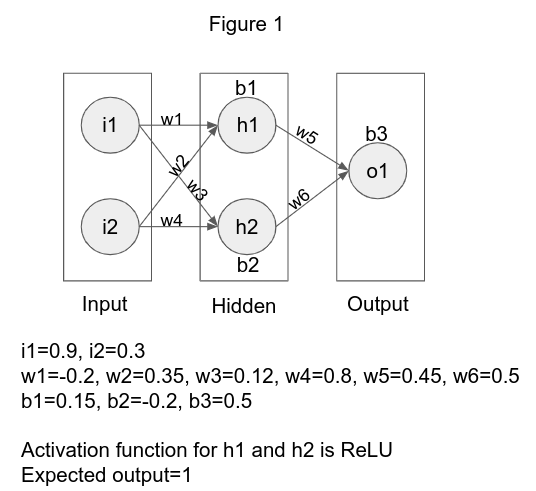

There are a few error functions you can use here. For instance, here we used mean square error.

In [ ]:
from scipy.misc import derivative
import numpy as np
from sklearn.metrics import mean_squared_error

${net}_{{h}_{1}} = {w}_{1}*{i}_{1}+{w}_{2}*{i}_{2}+{b}_{1}$

${net}_{{h}_{2}} = {w}_{3}*{i}_{1}+{w}_{4}*{i}_{2}+{b}_{2}$

In [ ]:
net_h1 = (-0.2 * 0.9) + (0.35 * 0.3) + 0.15
net_h2 = (0.12 * 0.9) + (0.8 * 0.3) + -0.2

print(net_h1)
print(net_h2)

0.07499999999999997
0.14799999999999996


In [ ]:
def relu(x):
    """if the input is negative, it will return zero and 
    if the input is positive, it will return the input value"""
    return max(0.0, x)

In [ ]:
h1_out = relu(net_h1)
h2_out = relu(net_h2)

print(h1_out)
print(h2_out)

0.07499999999999997
0.14799999999999996


${net}_{{o}_{1}} = {w}_{5}*{out}_{{h}_{1}}+{w}_{6}*{out}_{{h}_{2}}+{b}_{3}$

In [ ]:
net_o1 = (0.45 * h1_out) + (0.5 * h2_out) + 0.5
print(net_o1)

0.60775


In [ ]:
mse = mean_squared_error([1], [net_o1])
print(f"The mean squared error for the network is {mse}")

The mean squared error for the network is 0.15386006249999998


b. Calculate the updates of the network weights w1, …, w6 and bias terms b1, b2, b3 using backpropagation. Assume a learning rate of 1 for the sake of simplicity. Note: Remember that a bias term is equivalent to a weighted constant input 1. **(3 points)**

**Note:** Here we are using the SSR function which is $(observed - predicted)^2$. The derivative of the $(observed - predicted)$ is $(predicted - observed)$ and the derivative of $X^2$ is $2X$ so here, we wrote it as $-2(observed-predicted)$ or it can be written as $2(predicted - observed)$.

A detailed explanation is found here: https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

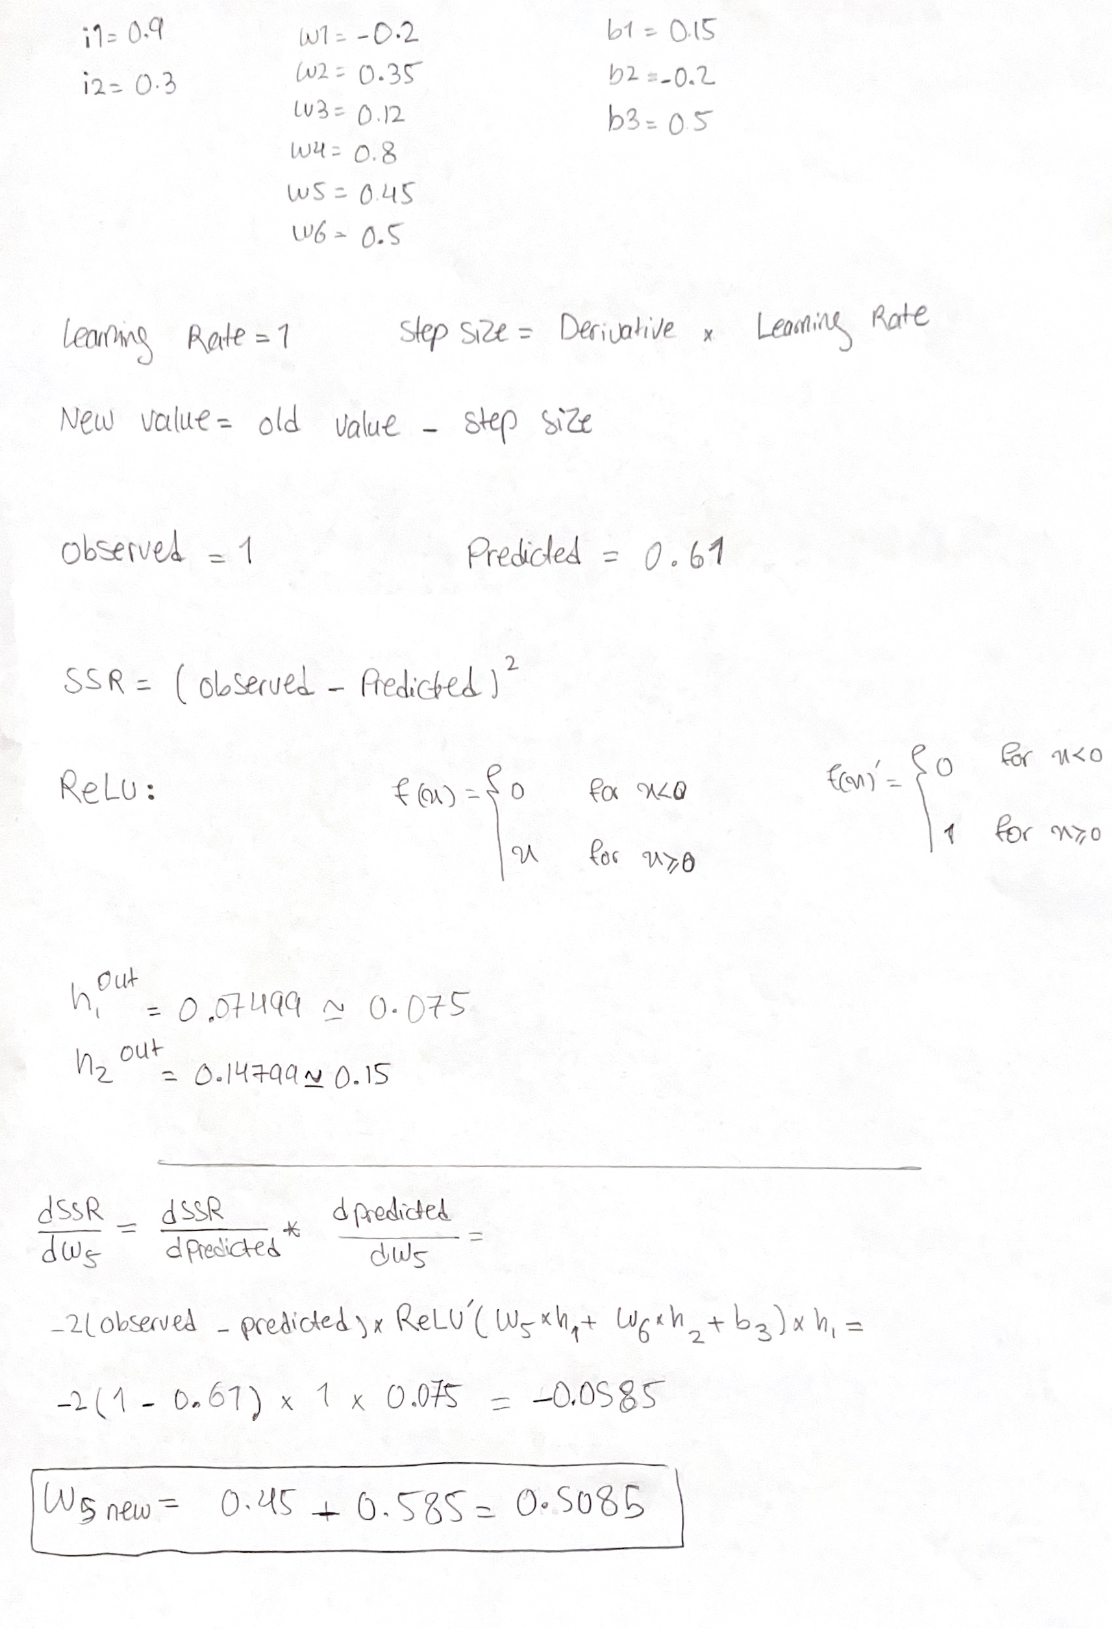

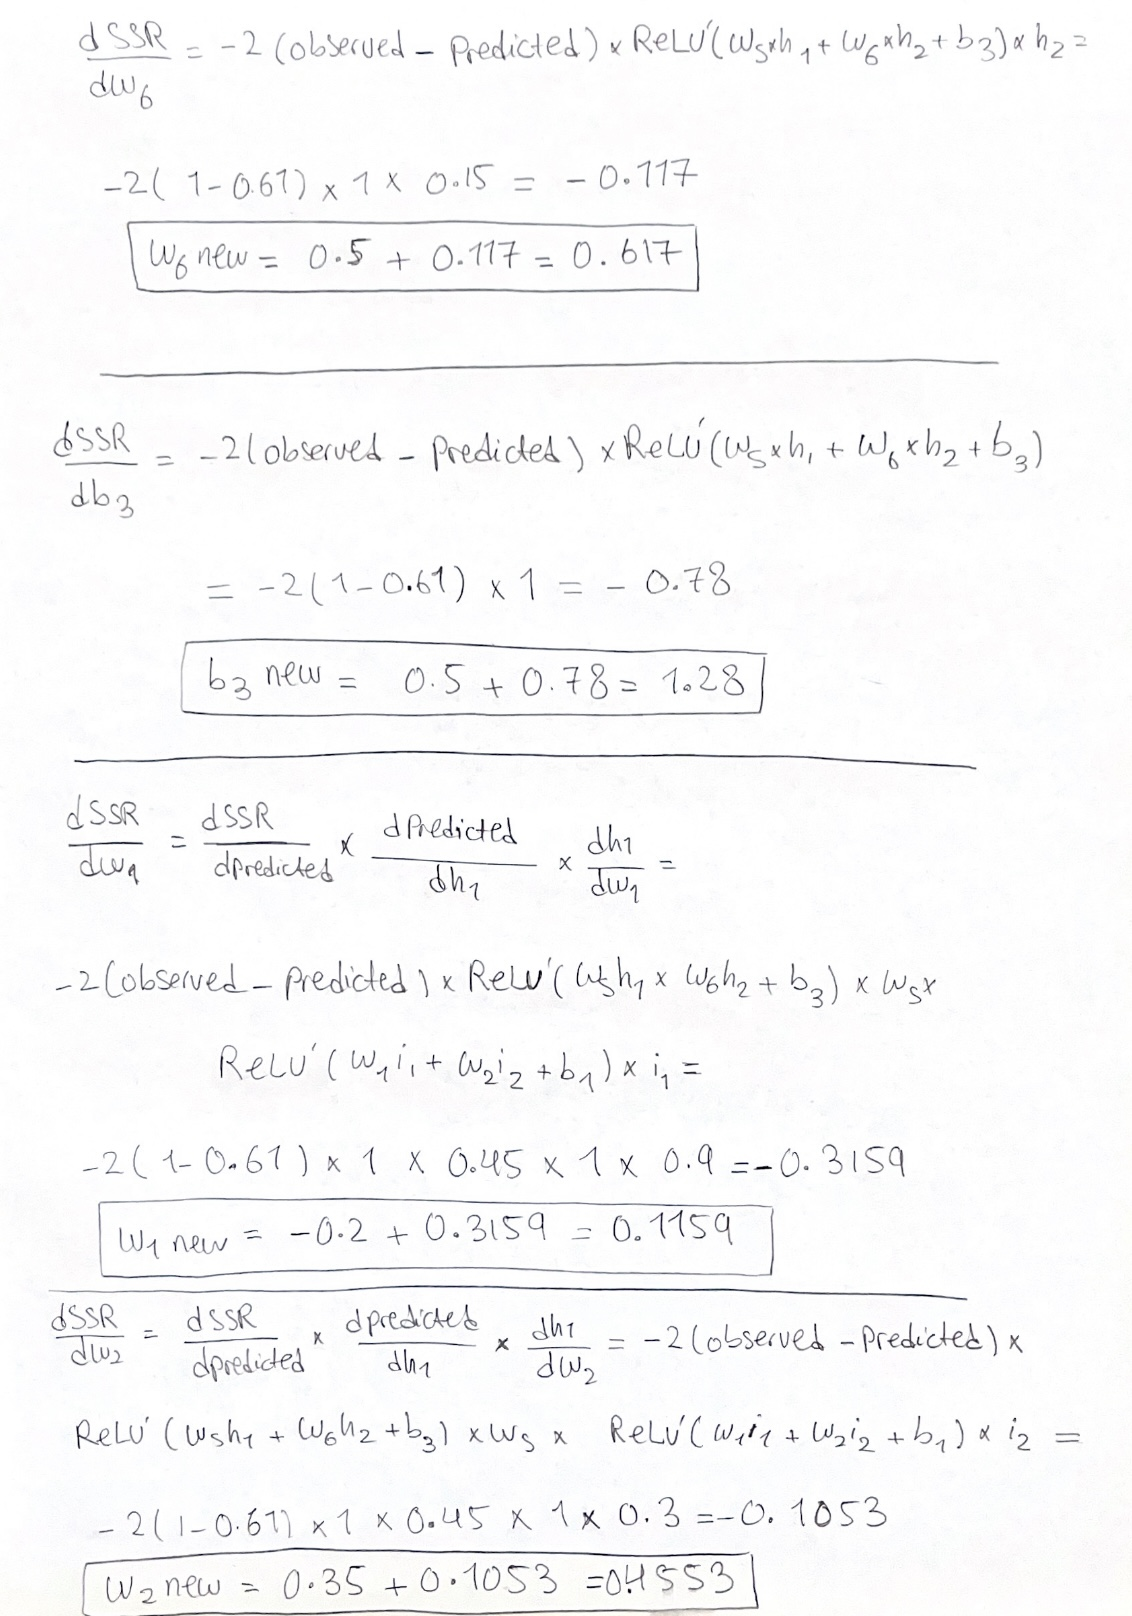

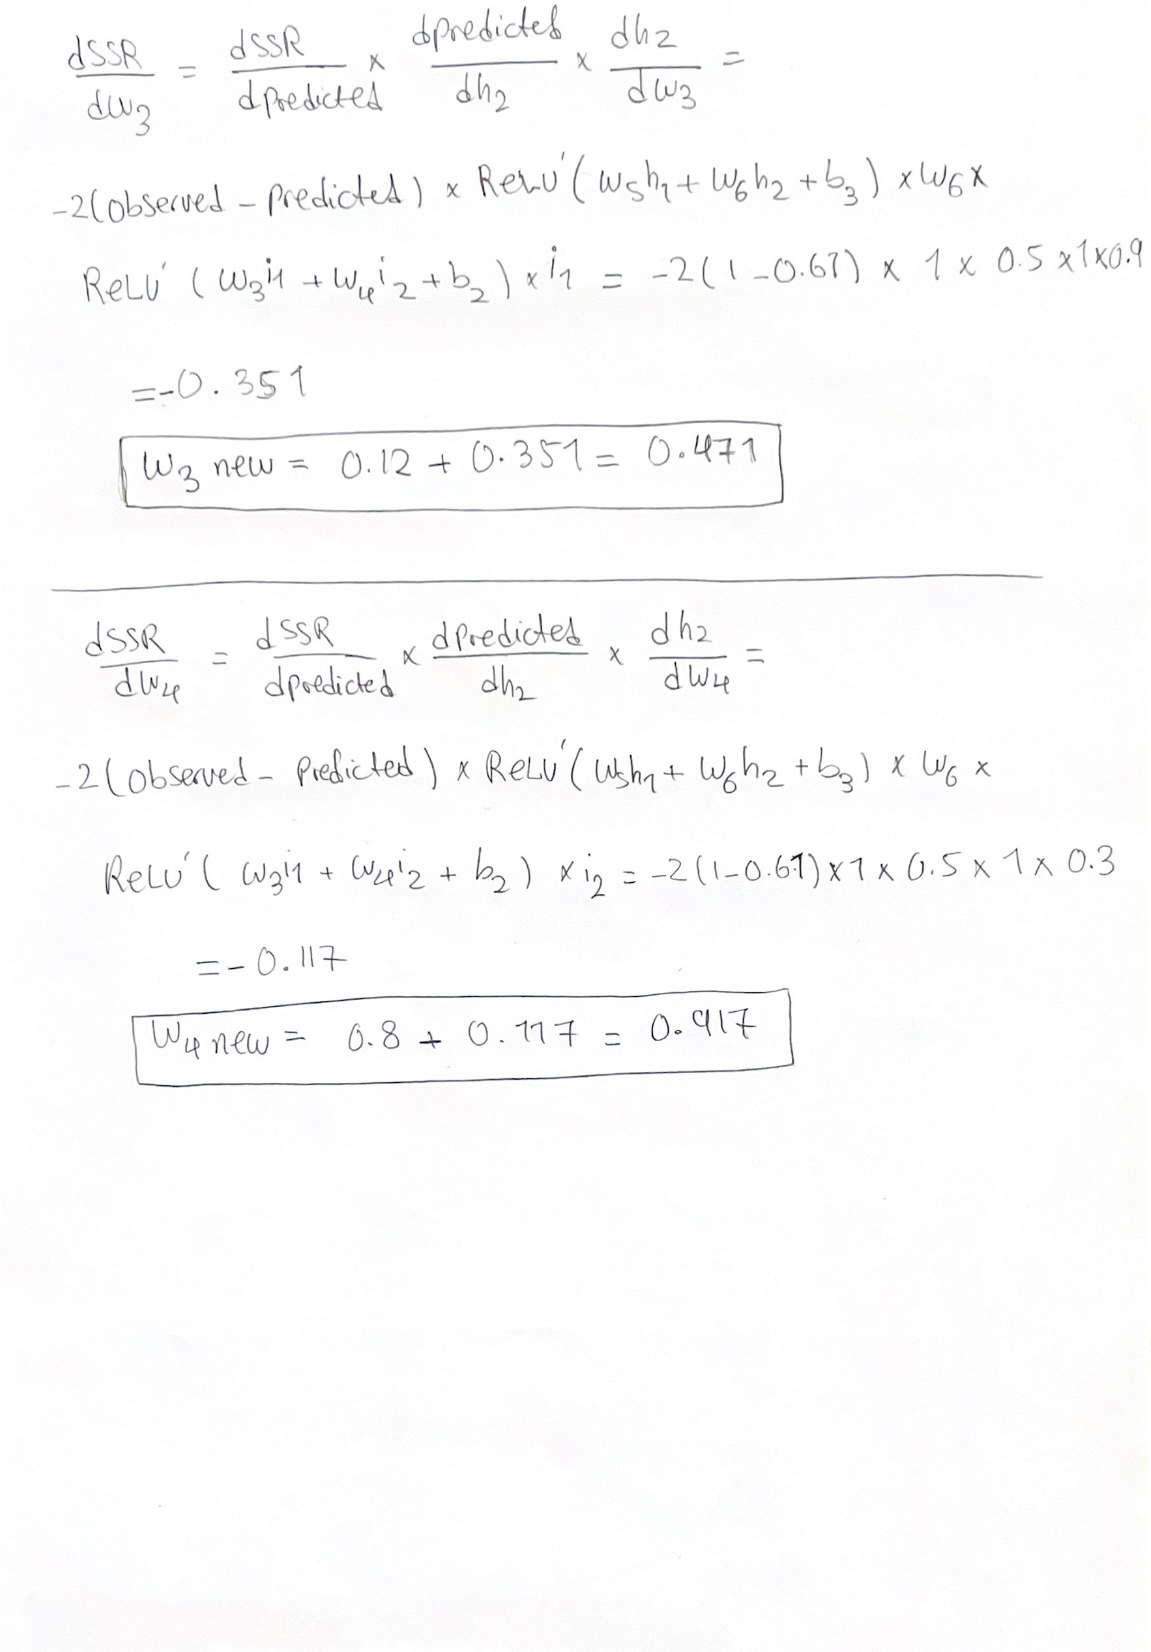

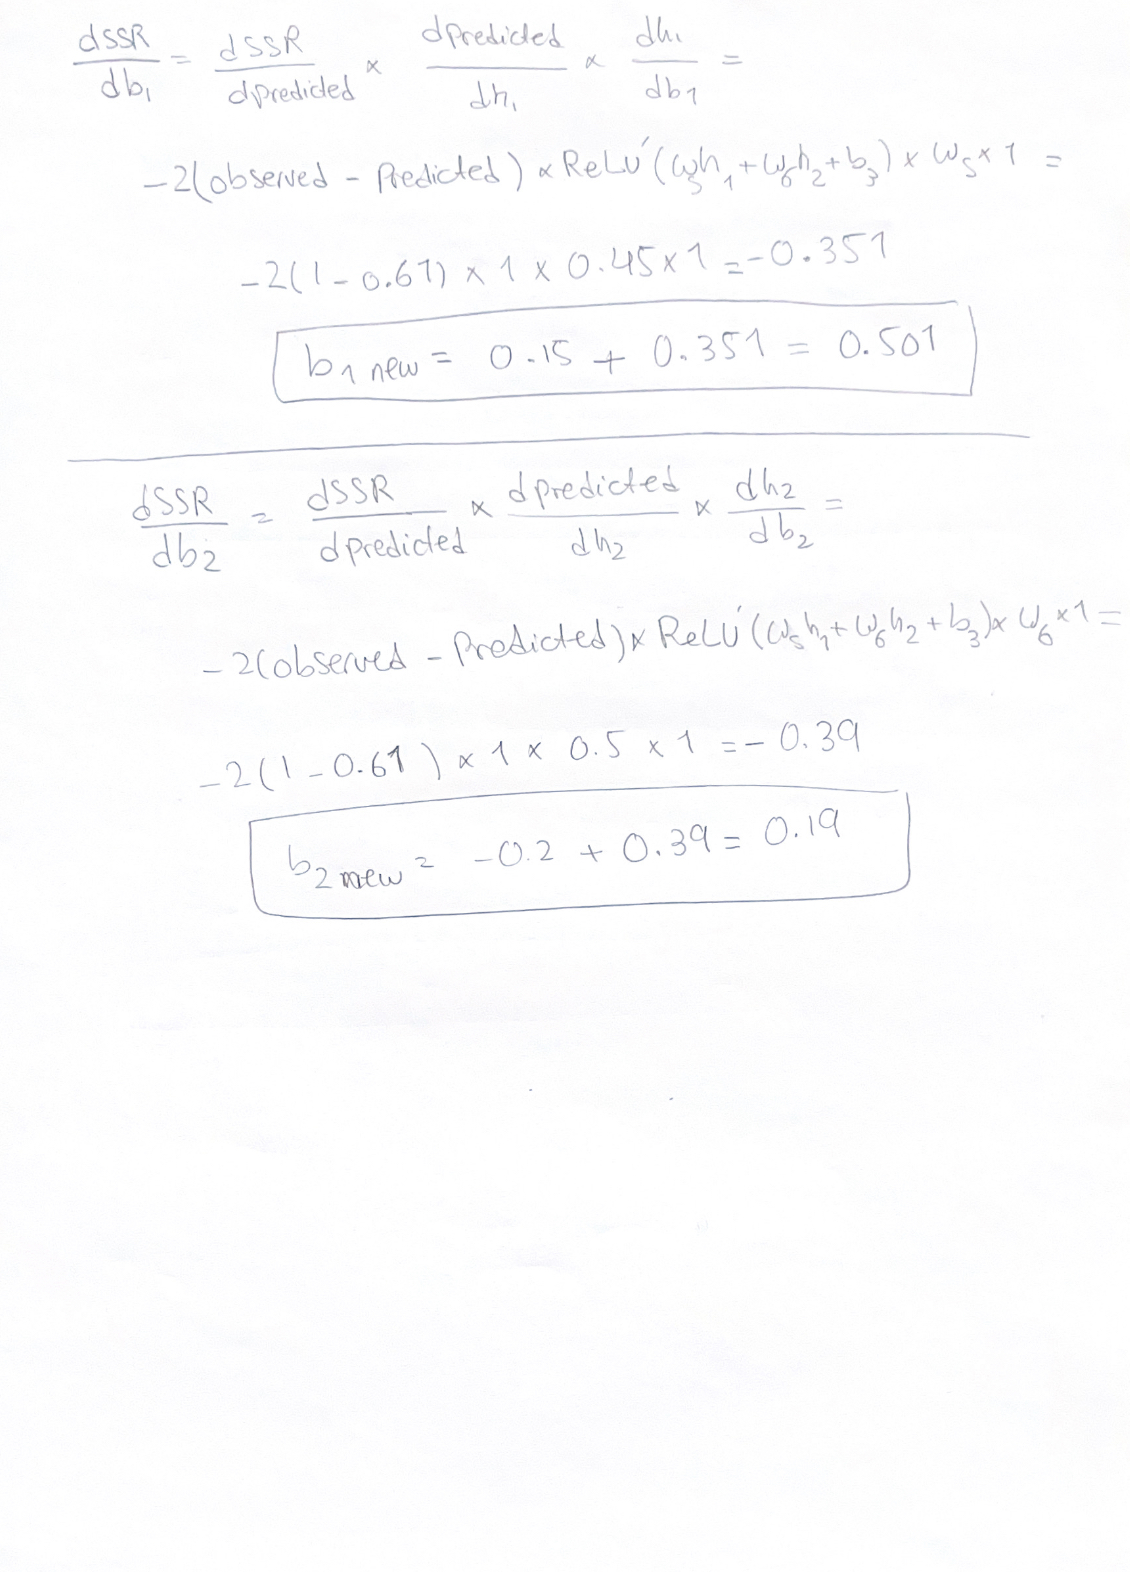

### Exercise 3 - NN Programming (7 points)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


#### 1. Familiarize yourself with tensorflow and train a neural network with 2 hidden layers (10 and 8 units respectively) and predict the label feature using the titanic_survival_dataset.csv dataset. (2 points)

In [ ]:
dataset = pd.read_csv("titanic_survival_data.csv")

X = dataset.drop(columns='Label').values
y = dataset['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = tf.keras.Sequential([
    layers.Dense(9),
    layers.Dense(10, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
])

loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

auc_roc = tf.keras.metrics.AUC(
    num_thresholds=200, curve='ROC',
    summation_method='interpolation', name=None, dtype=None,
    thresholds=None, multi_label=False, num_labels=None, label_weights=None,
    from_logits=True)

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy', auc_roc])

model.fit(X_train, y_train, epochs=500, verbose=0)

model.evaluate(X_test, y_test, verbose=2)

y_pred = model.predict(X_test)

6/6 - 0s - loss: 1.2281 - accuracy: 0.7821 - auc: 0.8156 - 292ms/epoch - 49ms/step


#### 2. Evaluate the performance of the neural network for the same dataset in a nested cross validation by optimizing the number of units in the 2nd hidden layer in the inner cross validation. (3 points)

In [ ]:
def tf_model(n_units=8):
    """Creates a tensorflow model with n_units for the 2nd hidden layer."""
    loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    auc_roc = tf.keras.metrics.AUC(
        num_thresholds=200, curve='ROC',
        summation_method='interpolation', name=None, dtype=None,
        thresholds=None, multi_label=False, num_labels=None, label_weights=None,
        from_logits=True)
    
    model = tf.keras.Sequential([
        layers.Dense(9),
        layers.Dense(10, activation='relu'),
        layers.Dense(n_units, activation='relu'),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy', auc_roc])
    
    return model

def out_cv(X, y, out_cv=5, in_cv=5):
    """Carries out outer cross-validation."""
    estimator = KerasClassifier(build_fn=tf_model, verbose=0)
    
    k_fold = StratifiedKFold(n_splits=out_cv, shuffle=True)
    
    results = []
    probs = []
    
    for run_num, (train_indexes, test_indexes) in enumerate(k_fold.split(X, y)):
        print(f"===========Outer Cross Validation: Run - {run_num+1}==========")
        x_train = np.asarray(
            [X.iloc[train_index, :].values.tolist()
             for train_index in train_indexes]
        )
        x_test = np.asarray(
            [X.iloc[test_index, :].values.tolist()
             for test_index in test_indexes]
        )
        y_train = np.asarray(
            [y[train_index]
             for train_index in train_indexes]
        )
        y_test = np.asarray(
            [y[test_index]
             for test_index in test_indexes]
        )

        clf = GridSearchCV(estimator=estimator, param_grid={"n_units": [5, 8, 10, 20]}, cv=in_cv, verbose=0)

        print("===========Inner Cross Validation: ==========")
        y_fit = clf.fit(x_train, y_train, **{"verbose": 0})

        y_pred = clf.best_estimator_.predict(x_test)
        
        probs.append(clf.best_estimator_.predict_proba(x_test))
        
        results.append(roc_auc_score(y_test, y_pred))
        
        print(y_fit.best_params_)
    
    return results, probs, y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


===========Outer Cross Validation: Run - 1==========
===========Inner Cross Validation: ==========


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow

{'n_units': 10}
===========Outer Cross Validation: Run - 2==========
===========Inner Cross Validation: ==========


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow

{'n_units': 10}
===========Outer Cross Validation: Run - 3==========
===========Inner Cross Validation: ==========


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow

{'n_units': 8}
===========Outer Cross Validation: Run - 4==========
===========Inner Cross Validation: ==========


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow

{'n_units': 5}
===========Outer Cross Validation: Run - 5==========
===========Inner Cross Validation: ==========


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow

{'n_units': 10}


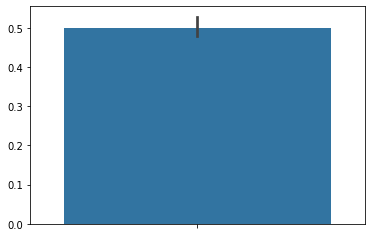

In [ ]:
dataset = pd.read_csv("titanic_survival_data.csv")

X = dataset.drop(columns='Label')
y = dataset['Label']

results, probs, y_pred = out_cv(X, y)

sns.barplot(y=results)

#### 3. How does the neural network perform in comparison to the models in the calibration curve from the previous task and plot the results alongside the other models in the calibration plot? (2 points)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


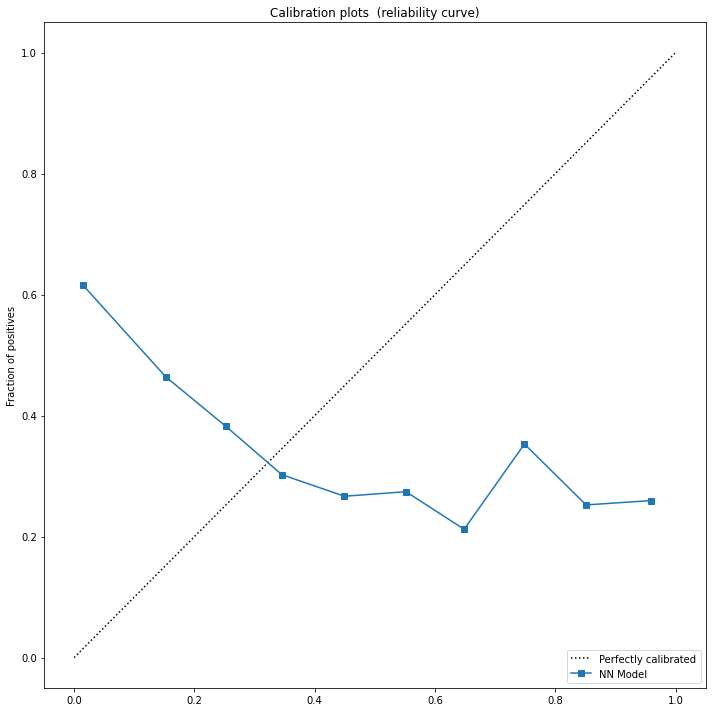

In [ ]:
model = tf_model(n_units=10)
model.fit(X, y, verbose=0)

tf_proba = model.predict(X, verbose=0)
tf_fraction_of_positives, tf_mean_predicted_value = calibration_curve(y, tf_proba, n_bins=10)

plt.figure(figsize=(10, 10))

plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.plot(tf_mean_predicted_value, tf_fraction_of_positives, "s-",
             label="%s" % ("NN Model", ))
    
plt.ylabel("Fraction of positives")
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.title('Calibration plots  (reliability curve)')

plt.tight_layout()
plt.show()